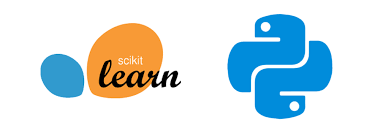

In [ ]:
pip install rich

# Imports

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
from plotly.colors import n_colors
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from rich import print
from rich.table import Table

np.random.seed(1)

# Reading DataFrame

In [ ]:
df = pd.read_csv("../input/heart-attack-analysis-prediction-dataset/heart.csv")

fig = go.Figure(data=[go.Table(
     header=dict(values=df.columns.T,
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], df.iloc[:,3], df.iloc[:,4],df.iloc[:,5] ,df.iloc[:,6],
                       df.iloc[:,7],df.iloc[:,8],df.iloc[:,9],df.iloc[:,10],df.iloc[:,11],df.iloc[:,12],df.iloc[:,13]],
               fill_color='lavender',
               align='left'),columnwidth = [400,400])                    
])
fig.update_layout( title={'text': "Data Frame"}, width=1000, height=500)
fig.show()

# Data Wrangling:

* age - age in years
* sex - sex (1 = male; 0 = female)
* cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* chol - serum cholestoral in mg/dl
* fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
* restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
* ca - number of major vessels (0-3) colored by flourosopy
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
* output- the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

In [ ]:
fig = go.Figure(data=[go.Table(
    cells=dict(values=[df.columns, df.isna().sum()],
               fill_color='lavender',
               align='left'))
])
fig.update_layout( title={
        'text': "Missing Values"}, width=500, height=500)
fig.show()

# Feature Selection

In [ ]:
df.corr()[['output']].multiply(100).T.applymap('{:.2f}%'.format)

Taking __Threshold as 10%__ dropping not so correlated features.
<br>
- __CHOL__
<br>
- __FBS__

In [ ]:
df.drop(['chol', 'fbs'], axis=1, inplace=True)
df.head(2)

# Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:, -1], test_size=0.20, random_state=42)

# MODEL

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

clf = VotingClassifier(estimators=[('Logistic Regression', LogisticRegression(max_iter=1000, random_state=12)), ('Random Forest Classifier', RandomForestClassifier(max_depth=2, random_state=12)), ('GaussianNB', GaussianNB())], voting='hard')
clf.fit(X_train, y_train)
print('[black]The SCORE of Classifier : [/black][underline][red][bold]{:.1f}[/red][/bold]'.format(clf.score(X_test, y_test)*100))

In [ ]:
table = Table(show_header=True, header_style="bold magenta", show_lines=True, )
table.add_column("MODEL", style="dim", width=30)
table.add_column("SCORE")
table.add_row(
    list(clf.named_estimators_.keys())[0], '[black]{:.3}[/black]'.format(clf.estimators_[0].score(X_test, y_test)*100)
)
table.add_row(
    list(clf.named_estimators_.keys())[1],'[black]{:.3}[/black]'.format(clf.estimators_[1].score(X_test, y_test)*100)
)
table.add_row(
    list(clf.named_estimators_.keys())[2],'[black]{:.3}[/black]'.format(clf.estimators_[2].score(X_test, y_test)*100)
)
table.add_row(
    '[red][bold]Voting Classifer[/bold][/red]','[red][bold]{:.3}[/bold][/red]'.format(clf.score(X_test, y_test)*100)
)
print(table)

> The idea behind the __VotingClassifier__ is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses.

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure()
ax = sns.heatmap(confusion_matrix(y_test, clf.predict(X_test)),annot=True, cbar=False)
ax.set_title("CONFUSION MATRIX")
plt.show()

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(clf,classes=['< diameter narrowing', '> 50% diameter narrowing'],support=True, output_dict=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()
plt.show()

<font color=red>Precision</font>
> Precision can be seen as a measure of a classifier’s exactness. For each class, it is defined as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

<font color=red>Recall</font>
> Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

<font color=red>F1 score</font>
> The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

<font color=red>Support</font>
> Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.